In [21]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")

In [3]:
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
target = "EP"
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 1)
pipe = pipeline.Pipeline([
    
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training MSE", metrics.mean_squared_error(y_train, y_train_pred),
     "\nTesting MSE", metrics.mean_squared_error(y_test, y_test_pred),
     "\nTraining R2", metrics.r2_score(y_train, y_train_pred),
     "\nTesting R2", metrics.r2_score(y_test, y_test_pred)) 


Training MSE 9.787557016553564e-05 
Testing MSE 9.882808699958435e-05 
Training R2 0.9298928647544801 
Testing R2 0.9294444312957376


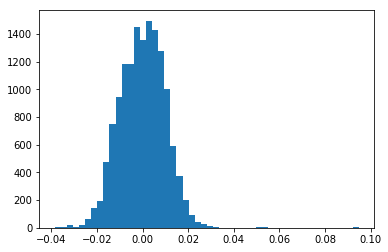

In [8]:
plt.hist(y_test_pred-y_test, bins = 50);

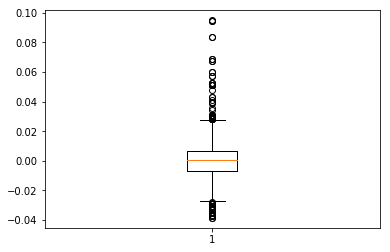

In [11]:
plt.boxplot(y_test_pred-y_test);

Text(0.5,1,'Residual plot')

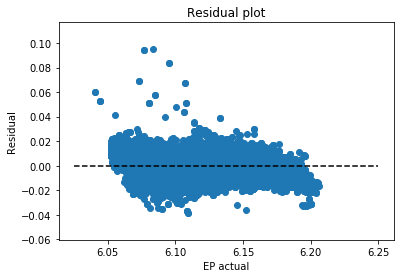

In [20]:
plt.scatter(y_test, y_test_pred-y_test)
plt.plot([6.025, 6.25], [0,0], ls = "--", color = "black")
plt.xlabel("EP actual")
plt.ylabel("Residual")
plt.title("Residual plot")

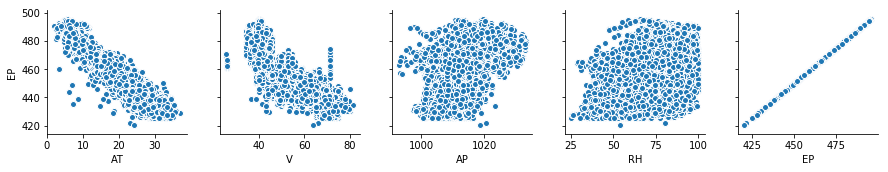

In [23]:
sns.pairplot(df, x_vars=df.columns, y_vars="EP")

In [24]:
target = "EP"
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X["V2"] = X.V ** 2

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 1)
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training MSE", metrics.mean_squared_error(y_train, y_train_pred),
     "\nTesting MSE", metrics.mean_squared_error(y_test, y_test_pred),
     "\nTraining R2", metrics.r2_score(y_train, y_train_pred),
     "\nTesting R2", metrics.r2_score(y_test, y_test_pred)) 


Training MSE 9.64326405914813e-05 
Testing MSE 9.728045289548598e-05 
Training R2 0.9309264184658597 
Testing R2 0.9305493216935578


In [27]:
tmp = X.copy()
tmp["EP"] = y

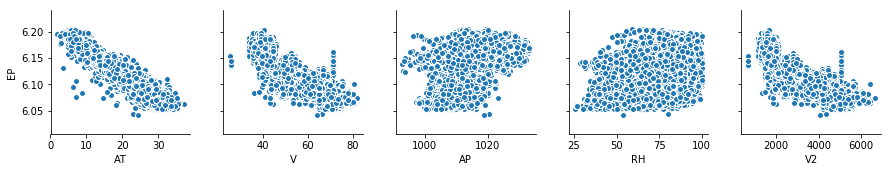

In [28]:
sns.pairplot(tmp, x_vars=X.columns, y_vars="EP")

In [36]:
target = "EP"
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 1)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training MSE", metrics.mean_squared_error(y_train, y_train_pred),
     "\nTesting MSE", metrics.mean_squared_error(y_test, y_test_pred),
     "\nTraining R2", metrics.r2_score(y_train, y_train_pred),
     "\nTesting R2", metrics.r2_score(y_test, y_test_pred)) 


Training MSE 8.0341042159019e-05 
Testing MSE 8.123972564939002e-05 
Training R2 0.9424526437099449 
Testing R2 0.942001153532446


In [33]:
a = np.random.randint(-3, 5, [4, 3])
a

array([[ 2,  3,  0],
       [-1,  0,  3],
       [-3, -3,  0],
       [-1, -2,  4]])

In [35]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(a)

array([[ 2.,  3.,  0.,  4.,  6.,  0.,  9.,  0.,  0.],
       [-1.,  0.,  3.,  1., -0., -3.,  0.,  0.,  9.],
       [-3., -3.,  0.,  9.,  9., -0.,  9., -0.,  0.],
       [-1., -2.,  4.,  1.,  2., -4.,  4., -8., 16.]])